# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 1384 Камынин Александр Александрович и Кондратенко Константин Евгеньевич. Вариант №8.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования. 


## Основные теоретические положения

- Круговая и циклическая частоты: $$ \omega = 2 \pi f $$

 Квадратурные формулы для численного интегрирования:
 - Формула прямоугольников:
    $$y_{n+1} = y_n + s_{n+\frac{1}{2}}$$
 - Формула трапеций:
    $$y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1})$$
 - Формула Симпсона:
    $$y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1})$$
 - Формула интегрирования «по правилу 3/8»:
    $$y_{n+2} = y_{n-1} + \frac{1}{8}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$$


## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул. 

## Выполнение работы

In [198]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

from IPython.display import display, Math

### Задание 1.

Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

Квадратурная формула прямоугольников выглядит следующим образом:

$$ y_{n+1} = y_{n} + s_{n + \frac{1}{2}} $$

Здесь $ s_n = e^{i \omega n} $, $y_n = H(\omega) s_n$

Тогда, чтобы найти $H(\omega)$, необходимо решить следующую систему уравнений:

$$ \begin{cases}
y_{n + 1} = H(\omega) e^{i \omega n} + e^{i \omega (n + \frac{1}{2})} \\
y_{n + 1} = H(\omega) e^{i \omega (n + 1)}
\end{cases} $$

Решение системы (код для решения представлен ниже) выглядит таким образом:

$$ H(\omega) = - \frac{0.5 i}{sin(0.5 \omega)} $$

Подставив $ \omega = 2 \pi f $, получаем:

$$ H(f) = - \frac{0.5 i}{sin(\pi f)} $$

---

Точное значение интеграла от $s_n$ равно: $ \frac{e^{i \omega n}}{i \omega} = s_n \cdot \frac{1}{i \omega} $

Тогда отношение вычисленного значения к точному:

$$ \gamma = \frac{\text{вычисленное}}{\text{точное}} = \frac{ 0.5 \omega }{ sin(0.5 \omega) }  = \frac{ \pi f }{ sin(\pi f) }$$

In [199]:
w, H, n, y = sp.symbols('w H n y')
f = sp.symbols('f')

equation = sp.Eq(H * sp.exp(sp.I * w * (n + 1)), H * sp.exp(sp.I * w * n) + sp.exp(sp.I * w * (n + 1/2)))
solution = sp.solve(equation, H)[0]

latex = sp.latex(solution)
print("H(omega):")
display(Math(latex))

print("H(f):")
hf = solution.subs(w, 2 * sp.pi * f)
latex = sp.latex(hf)
display(Math(latex))

accurate_solution = 1 / (sp.I * w)

gamma_w = solution / accurate_solution
latex = sp.latex(gamma_w)
print("gamma_w:")
display(Math(latex))

gamma_f = hf / accurate_solution
gamma_f = gamma_f.subs(w, 2 * sp.pi * f)
latex = sp.latex(gamma_f)
print("gamma_f:")
display(Math(latex))

H(omega):


<IPython.core.display.Math object>

H(f):


<IPython.core.display.Math object>

gamma_w:


<IPython.core.display.Math object>

gamma_f:


<IPython.core.display.Math object>

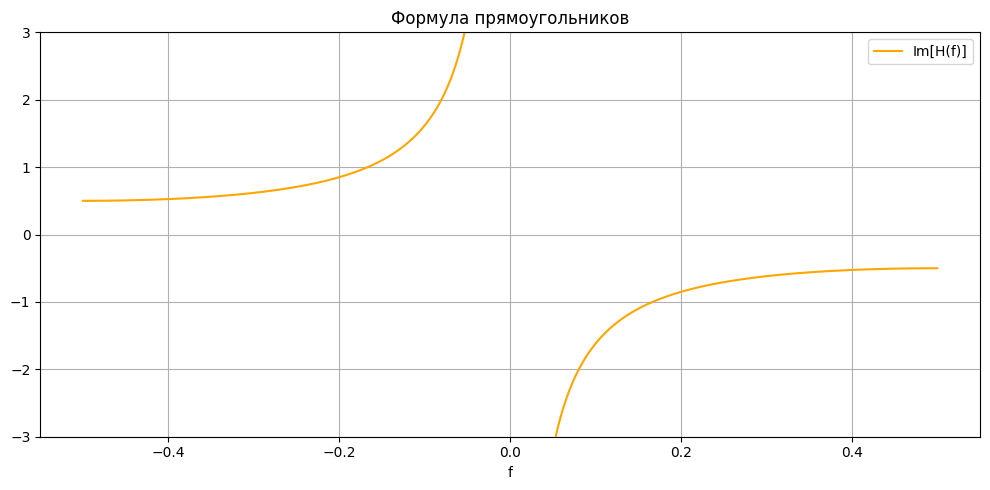

In [200]:
f = np.linspace(-0.5, 0.5, 400)

y = - 0.5j / np.sin(np.pi * f)

# Разделяем действительную и мнимую части
real_part = np.real(y)
imag_part = np.imag(y)
imag_part[np.abs(imag_part)>6] = None

plt.figure(figsize=(10, 5))
plt.plot(f, imag_part, label='Im[H(f)]', color='orange')
plt.title('Формула прямоугольников')
plt.xlabel('f')
plt.legend()
plt.grid(True)
plt.ylim(-3, 3)
plt.tight_layout()
plt.show()


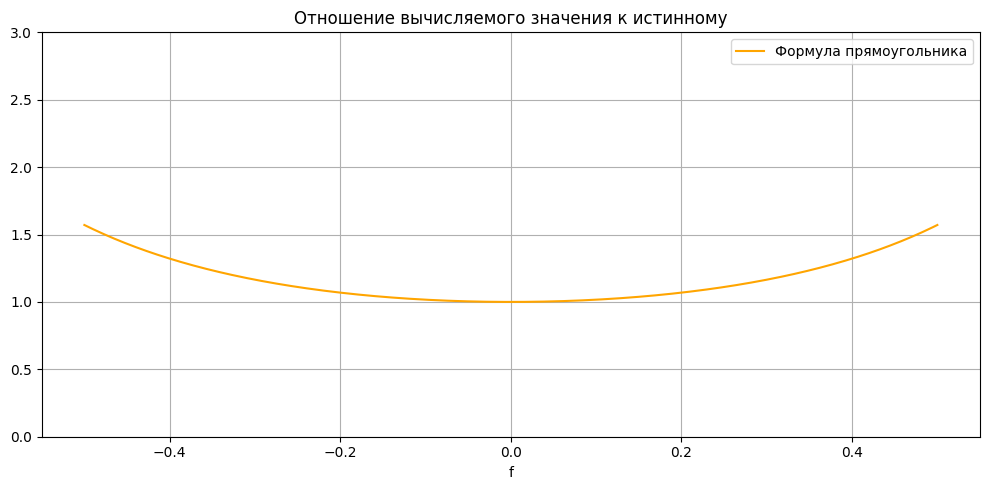

In [201]:
f = np.linspace(-0.5, 0.5, 400)

y = (np.pi * f) / np.sin(np.pi * f)


plt.figure(figsize=(10, 5))
plt.plot(f, y, label='Формула прямоугольника', color='orange')
plt.title('Отношение вычисляемого значения к истинному')
plt.xlabel('f')
plt.legend()
plt.grid(True)
plt.ylim(0, 3)
plt.tight_layout()
plt.show()


Квадратурная формула трапеции выглядит следующим образом:

$$ y_{n+1} = y_{n} + \frac{1}{2} ( s_{n} + s_{n+1} ) $$

Здесь $ s_n = e^{i \omega n} $, $y_n = H(\omega) s_n$

Тогда, чтобы найти $H(\omega)$, необходимо решить следующую систему уравнений:

$$ \begin{cases}
y_{n + 1} = H(\omega) e^{i \omega n} + \frac{1}{2} (e^{i \omega n} + e^{i \omega (n+1)})   \\
y_{n + 1} = H(\omega) e^{i \omega (n + 1)}
\end{cases} $$

Решение системы (код для решения представлен ниже) выглядит таким образом:

$$ H(\omega) = - \frac{0.5 i}{ \tan(0.5 \omega)} $$

Подставив $ \omega = 2 \pi f $, получаем:

$$ H(f) =  - \frac{0.5 i}{ \tan(\pi f)} $$

---

Точное значение интеграла от $s_n$ равно: $ \frac{e^{i \omega n}}{i \omega} = s_n \cdot \frac{1}{i \omega} $

Тогда отношение вычисленного значения к точному:

$$ \gamma = \frac{\text{вычисленное}}{\text{точное}} = \frac{ \pi f }{ \tan(\pi f) }$$



In [202]:
w, H, n, y = sp.symbols('w H n y')
f = sp.symbols('f')

equation = sp.Eq(H * sp.exp(sp.I * w * (n + 1)),
                 H * sp.exp(sp.I * w * n) + 1/2 * (sp.exp(sp.I * w * n) + sp.exp(sp.I * w * (n + 1)))
                 )
solution = sp.solve(equation, H)[0]

latex = sp.latex(solution)
print("H(omega):")
display(Math(latex))

print("H(f):")
hf = solution.subs(w, 2 * sp.pi * f)
latex = sp.latex(hf)
display(Math(latex))

accurate_solution = 1 / (sp.I * w)

gamma_w = solution / accurate_solution
latex = sp.latex(gamma_w)
print("gamma_w:")
display(Math(latex))

gamma_f = hf / accurate_solution
gamma_f = gamma_f.subs(w, 2 * sp.pi * f)
latex = sp.latex(gamma_f)
print("gamma_f:")
display(Math(latex))


H(omega):


<IPython.core.display.Math object>

H(f):


<IPython.core.display.Math object>

gamma_w:


<IPython.core.display.Math object>

gamma_f:


<IPython.core.display.Math object>

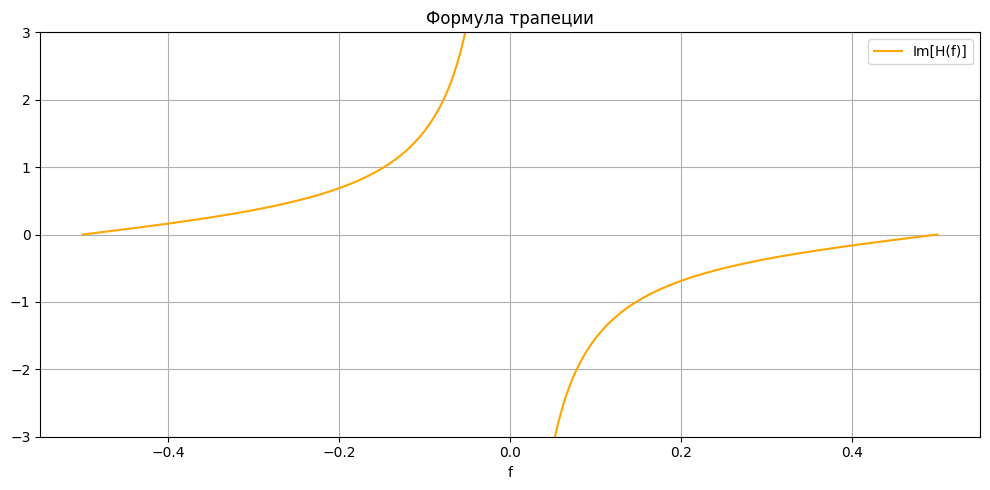

In [203]:
f = np.linspace(-0.5, 0.5, 400)

y = - 0.5j / np.tan(np.pi * f)

# Разделяем действительную и мнимую части
real_part = np.real(y)
imag_part = np.imag(y)
imag_part[np.abs(imag_part)>5] = None

plt.figure(figsize=(10, 5))
plt.plot(f, imag_part, label='Im[H(f)]', color='orange')
plt.title('Формула трапеции')
plt.xlabel('f')
plt.legend()
plt.grid(True)
plt.ylim(-3, 3)
plt.tight_layout()
plt.show()


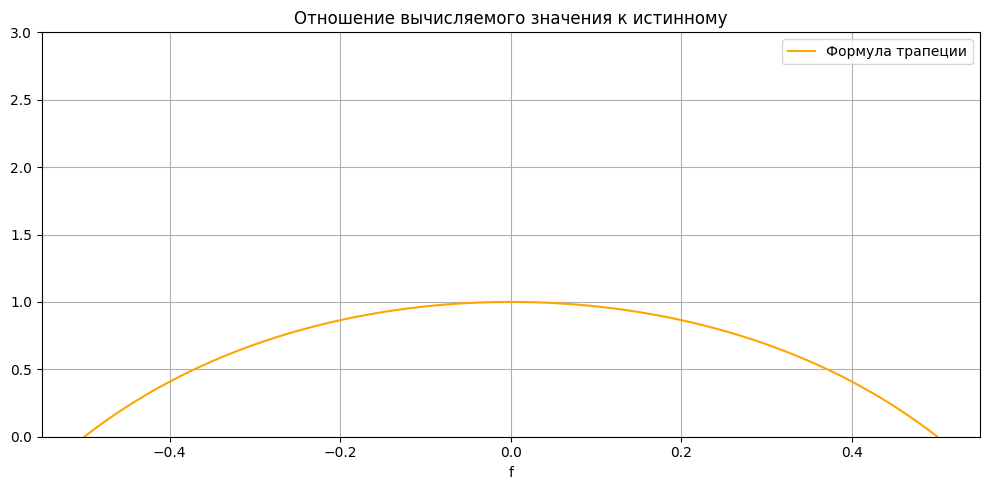

In [204]:
f = np.linspace(-0.5, 0.5, 400)

y = np.pi * f / np.tan( np.pi * f)


plt.figure(figsize=(10, 5))
plt.plot(f, y, label='Формула трапеции', color='orange')
plt.title('Отношение вычисляемого значения к истинному')
plt.xlabel('f')
plt.legend()
plt.grid(True)
plt.ylim(0, 3)
plt.tight_layout()
plt.show()


Квадратурная формула Симпсона выглядит следующим образом:

$$ y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_n + s_{n+1})$$

Здесь $ s_n = e^{i \omega n} $, $y_n = H(\omega) s_n$


Тогда, чтобы найти $H(\omega)$, необходимо решить следующую систему уравнений:

$$ \begin{cases}
y_{n + 1} =  H(\omega) e^{i \omega (n-1)} +  \frac{1}{3} ( e^{i \omega (n-1)} + 4e^{i \omega n} + e^{i \omega (n+1)}) \\
y_{n + 1} = H(\omega) e^{i \omega (n+1)}
\end{cases} $$

Решение системы (код для решения представлен ниже) выглядит таким образом:

$$ H(\omega) = \frac{4e^{i \omega} + e^{2 i \omega} + 1 }{ 3e^{2 i \omega} - 3 } = [ \text{вынесем из числителя и знаменателя } e^{i \omega} ] = \frac{ e^{i \omega} + 4 + e^{- i \omega} } { 3 (e^{i \omega} - e^{- i \omega}) } = \frac{4 + 2 \cos(\omega) }{ 6 i \sin(\omega) } = \frac{2 + \cos(\omega)}{ 3i \sin(\omega) } $$

Подставив $ \omega = 2 \pi f $, получаем:

$$ H(f) = \frac{2 + \cos(2 \pi f)}{ 3i \sin(2 \pi f) } $$

---

Точное значение интеграла от $s_n$ равно: $ \frac{e^{i \omega n}}{i \omega} = s_n \cdot \frac{1}{i \omega} $

Тогда отношение вычисленного значения к точному:

$$ \gamma = \frac{\text{вычисленное}}{\text{точное}} = [\text{вынесем из числителя и знаменателя } e^{2 i \omega}]  = \frac{2 + cos(2 \pi f)}{3} \cdot \frac{2 \pi f}{sin(2 \pi f)}  $$


In [205]:
w, H, n, y = sp.symbols('w H n y')
f = sp.symbols('f')

equation = sp.Eq(H * sp.exp(sp.I * w * (n + 1)),
                 H * sp.exp(sp.I * w * (n - 1)) \
                    + (1/3) * (sp.exp(sp.I * w * (n - 1)) \
                    +  4 * sp.exp(sp.I * w * n)  \
                    +  sp.exp(sp.I * w * (n + 1)))
                )
solution = sp.solve(equation, H)[0]

latex = sp.latex(solution)
print("H(omega): ")
display(Math(latex))

print("H(f):")
hf = solution.subs(w, 2 * sp.pi * f)
latex = sp.latex(hf)
display(Math(latex))

accurate_solution = 1 / (sp.I * w)

gamma_w = solution / accurate_solution
latex = sp.latex(gamma_w)
print("gamma_w:")
display(Math(latex))

gamma_f = hf / accurate_solution
gamma_f = gamma_f.subs(w, 2 * sp.pi * f)
latex = sp.latex(gamma_f)
print("gamma_f:")
display(Math(latex))

H(omega): 


<IPython.core.display.Math object>

H(f):


<IPython.core.display.Math object>

gamma_w:


<IPython.core.display.Math object>

gamma_f:


<IPython.core.display.Math object>

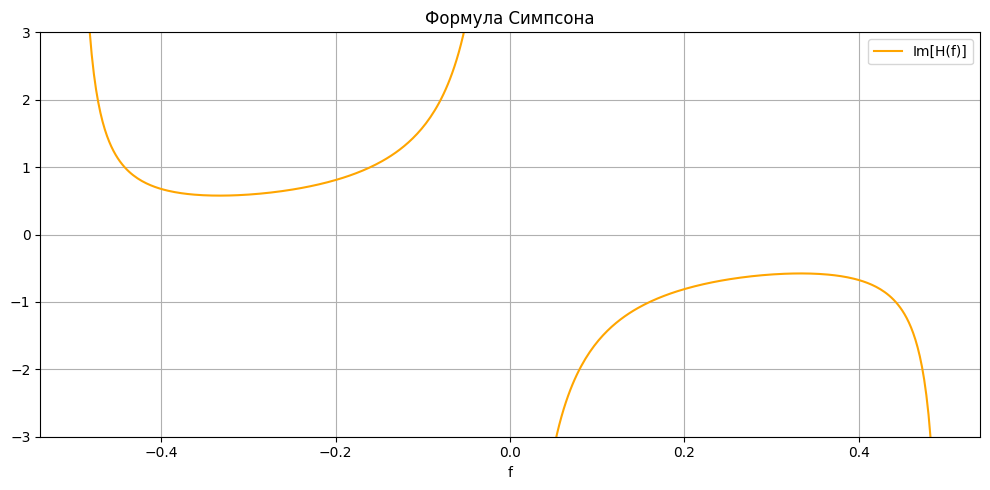

In [206]:
f = np.linspace(-0.5, 0.5, 400)

y =  (2 + np.cos(2* np.pi * f)) / (3j*np.sin(2* np.pi * f))

# Разделяем действительную и мнимую части
real_part = np.real(y)
imag_part = np.imag(y)
imag_part[np.abs(imag_part)>6] = None

plt.figure(figsize=(10, 5))
plt.plot(f, imag_part, label='Im[H(f)]', color='orange')
plt.title('Формула Симпсона')
plt.xlabel('f')
plt.legend()
plt.grid(True)
plt.ylim(-3, 3) 
plt.tight_layout()
plt.show()


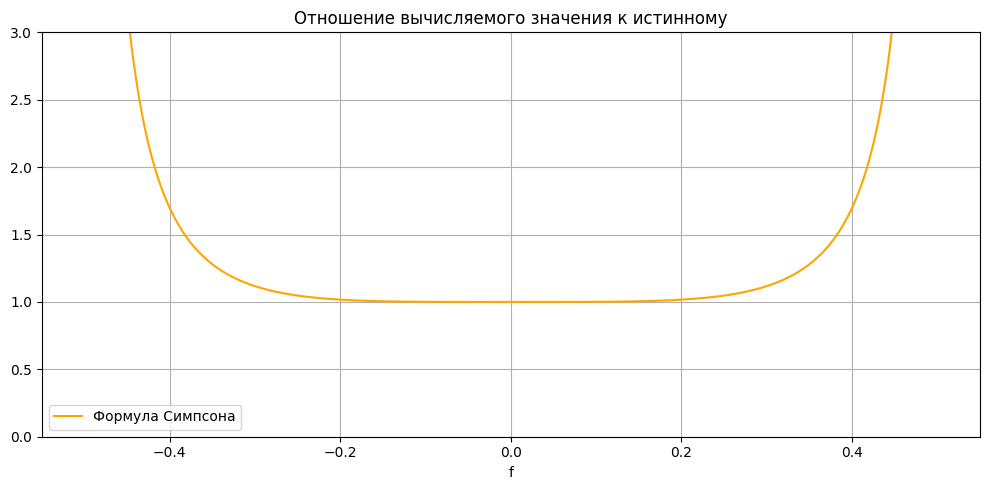

In [207]:
f = np.linspace(-0.5, 0.5, 400)

y = (2 + np.cos(2 * np.pi * f)) / (3) * \
      (2 * np.pi * f) / (np.sin(2 * np.pi * f))


plt.figure(figsize=(10, 5))
plt.plot(f, y, label='Формула Симпсона', color='orange')
plt.title('Отношение вычисляемого значения к истинному')
plt.xlabel('f')
plt.legend()
plt.grid(True)
plt.ylim(0, 3)
plt.tight_layout()
plt.show()


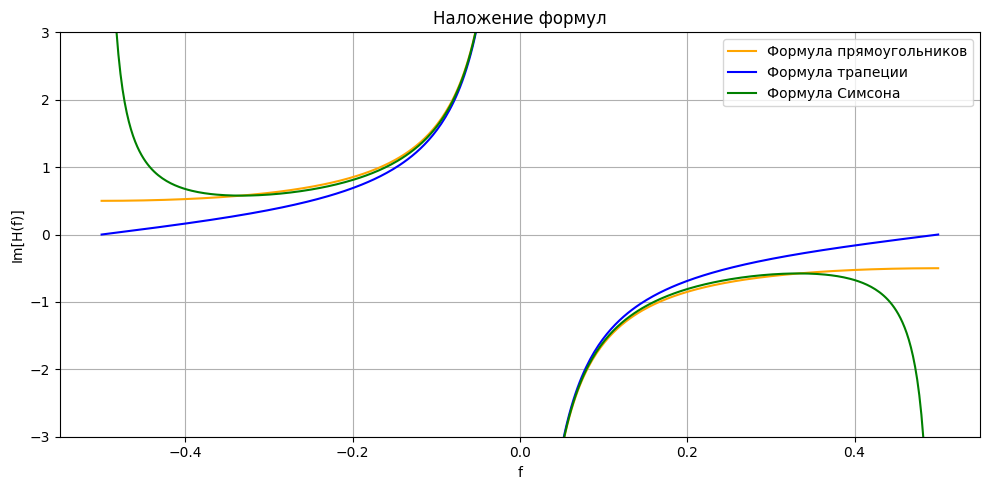

In [208]:
import numpy as np
import matplotlib.pyplot as plt

f = np.linspace(-0.5, 0.5, 400)

y1 = -0.5j / np.sin(np.pi * f)
y2 = -0.5j / np.tan(np.pi * f)
y3 =  (2 + np.cos(2* np.pi * f)) / (3j*np.sin(2* np.pi * f))


imag_part1 = np.imag(y1)
imag_part2 = np.imag(y2)
imag_part3 = np.imag(y3)

imag_part1[np.abs(imag_part1)>6] = None
imag_part2[np.abs(imag_part2)>6] = None
imag_part3[np.abs(imag_part3)>6] = None

plt.figure(figsize=(10, 5))

plt.plot(f, imag_part1, label='Формула прямоугольников', color='orange')
plt.plot(f, imag_part2, label='Формула трапеции', color='blue')
plt.plot(f, imag_part3, label='Формула Симсона', color='green')

plt.title('Наложение формул')
plt.xlabel('f')
plt.ylabel('Im[H(f)]')
plt.legend()
plt.grid(True)
plt.ylim(-3, 3)

plt.tight_layout()
plt.show()


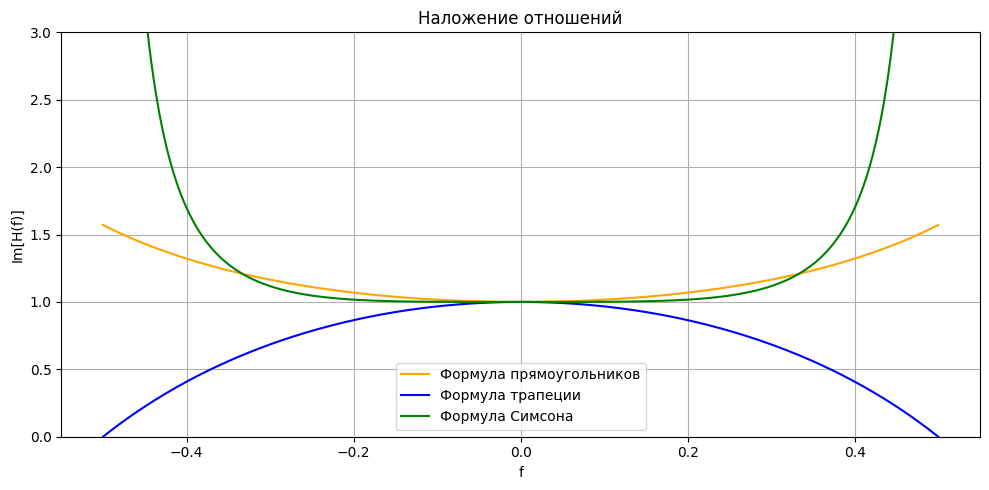

In [209]:
f = np.linspace(-0.5, 0.5, 400)

y1 = (np.pi * f) / np.sin(np.pi * f)
y2 = (np.pi * f) / np.tan( np.pi * f)
y3 = (2 + np.cos(2 * np.pi * f)) / (3) * \
      (2 * np.pi * f) / (np.sin(2 * np.pi * f))

imag_part1 = np.real(y1)
imag_part2 = np.real(y2)
imag_part3 = np.real(y3)

plt.figure(figsize=(10, 5))

plt.plot(f, imag_part1, label='Формула прямоугольников', color='orange')
plt.plot(f, imag_part2, label='Формула трапеции', color='blue')
plt.plot(f, imag_part3, label='Формула Симсона', color='green')

plt.title('Наложение отношений')
plt.xlabel('f')
plt.ylabel('Im[H(f)]')
plt.legend()
plt.grid(True)
plt.ylim(0, 3)

plt.tight_layout()
plt.show()


По построенным графикам можно сделать вывод, что:
1. Рекурсивный фильтр, соответствующий квадратурной формуле трапеции, **подавляет высокие** частоты. 
2. Рекурсивный фильтр, соответствующий квадратурной формуле прямоугольников, **немного усиливает высокие** частоты. 
3. Рекурсивный фильтр, соответствующий квадратурной формуле Симпсона, **усиливает намного сильнее высокие частоты**, чем рекурсивный фильтр, соответствующий квадратурной формуле прямоугольников.

### Задание 2.

Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8:

$$ y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1} ) $$

Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

$$ y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1} ) $$

Здесь $ s_n = e^{i \omega n} $, $y_n = H(\omega) s_n$


Тогда, чтобы найти $H(\omega)$, необходимо решить следующую систему уравнений:

$$ \begin{cases}
y_{n + 2} =  H(\omega) e^{i \omega (n-1)} +  \frac{1}{8} ( e^{i \omega (n+2)} + 3e^{i \omega (n+1)} + 3e^{i \omega n} + e^{i \omega (n-1)}  ) \\
y_{n + 2} = H(\omega) e^{i \omega (n+2)}
\end{cases} $$

Решение системы (код для решения представлен ниже) выглядит таким образом:

$$ H(\omega) = \frac{3e^{i \omega} + 3e^{2 i \omega} + e^{3 i \omega} + 1 }{ 8e^{3 i \omega} - 8 } =
 [ \text{вынесем из числителя и знаменателя } e^{i \omega} ] =
 \frac{ 3 + 3e^{i \omega} + e^{2i \omega} + e^{-i \omega} }{ 8(e^{2i \omega} - e^{-i \omega}) } =
 \frac{ \cos(\frac{3\omega}{2}) + 3 \cos{\frac{\omega}{2}} }{ 8 i \sin(\frac{3\omega}{2}) } $$

Подставив $ \omega = 2 \pi f $, получаем:

$$ H(f) = \frac{cos(3 \pi f) + 3 cos(\pi f)}{ 8i sin(3\pi f) } $$

---

Точное значение интеграла от $ s_n $ равно: $ \frac{e^{i \omega n}}{i \omega} = s_n \cdot \frac{1}{i \omega} $

Тогда отношение вычисленного значения к точному:

$$ \gamma = \frac{\text{вычисленное}}{\text{точное}} = [\text{вынесем из числителя и знаменателя } e^{0.5 i \omega}]  = 
    i \omega \frac{cos(\frac{3\omega}{2}) + 3 cos(\frac{\omega}{2})}{ 8i \sin(\frac{3\omega}{2}) } = 
    [\text{Домножим и разделим на 3/2}] = \frac{1}{12} (\cos(\frac{3\omega}{2}) + 3\cos(\frac{\omega}{2})) \cdot \frac{ \frac{3\omega}{2} }{ \sin(\frac{3\omega}{2}) } $$

$$ \gamma = \frac{1}{12} ( \cos(3\pi f) + 3 \cos(\pi f) ) \cdot \frac{ 3 \pi f }{ \sin(3 \pi f) } $$
 

In [210]:
w, H, n, y = sp.symbols('w H n y')
f = sp.symbols('f')

equation = sp.Eq(H * sp.exp(sp.I * w * (n + 2)),
                 H * sp.exp(sp.I * w * (n - 1)) \
                    + (1/8) * (sp.exp(sp.I * w * (n + 2)) \
                    +  3 * sp.exp(sp.I * w * (n + 1))  \
                    +  3 * sp.exp(sp.I * w * n) \
                    + sp.exp(sp.I * w * (n - 1)))
                )
solution = sp.solve(equation, H)[0]

latex = sp.latex(solution)
print("H(omega): ")
display(Math(latex))

print("H(f):")
hf = solution.subs(w, 2 * sp.pi * f)
latex = sp.latex(hf)
display(Math(latex))

accurate_solution = 1 / (sp.I * w)

gamma_w = solution / accurate_solution
latex = sp.latex(gamma_w)
print("gamma_w:")
display(Math(latex))

gamma_f = hf / accurate_solution
gamma_f = gamma_f.subs(w, 2 * sp.pi * f)
latex = sp.latex(gamma_f)
print("gamma_f:")
display(Math(latex))

H(omega): 


<IPython.core.display.Math object>

H(f):


<IPython.core.display.Math object>

gamma_w:


<IPython.core.display.Math object>

gamma_f:


<IPython.core.display.Math object>

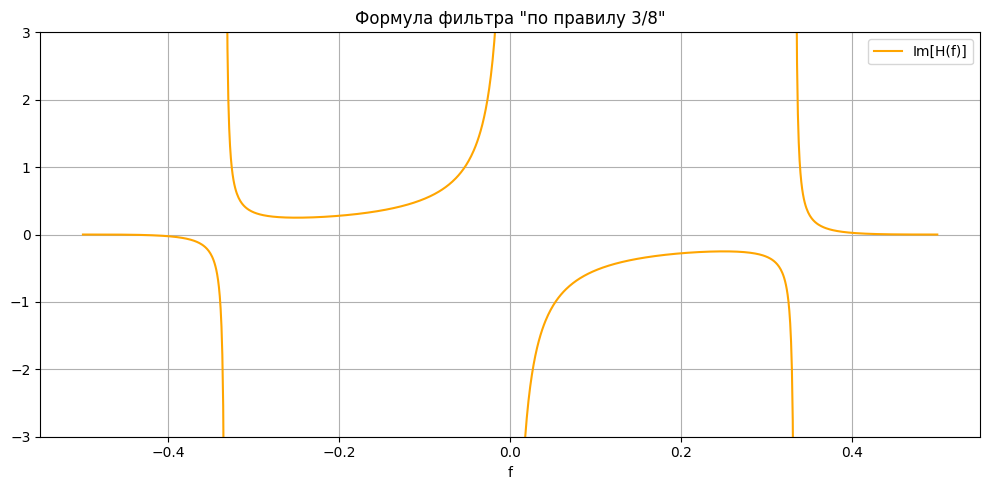

In [211]:
f = np.linspace(-0.5, 0.5, 1000)

y =  (np.cos(3 * np.pi * f) + 3 * np.cos(np.pi * f)) / (8 * 1j * np.sin(3 * np.pi * f))

real_part = np.real(y)
imag_part = np.imag(y)
imag_part[np.abs(imag_part) > 5] = None

plt.figure(figsize=(10, 5))
plt.plot(f, imag_part, label='Im[H(f)]', color='orange')
plt.title('Формула фильтра "по правилу 3/8"')
plt.xlabel('f')
plt.legend()
plt.grid(True)
plt.ylim(-3, 3) 
plt.tight_layout()
plt.show()

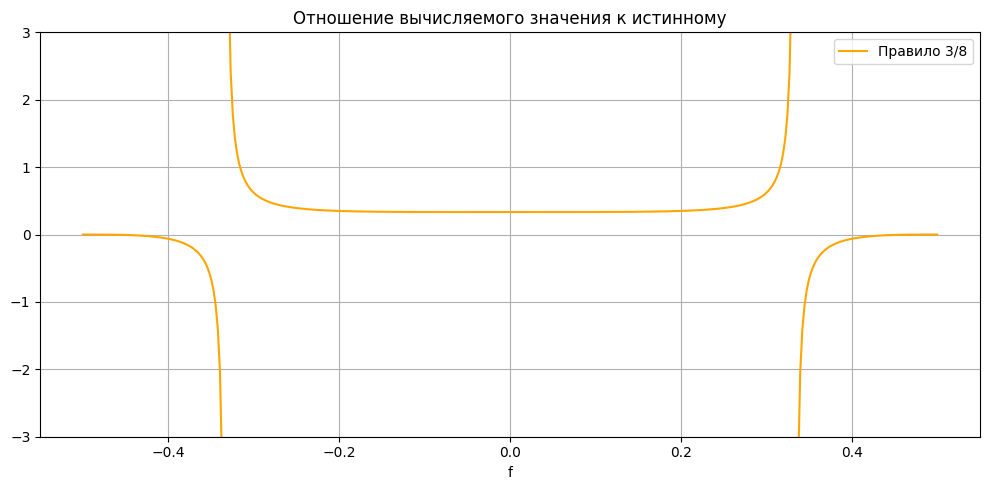

In [212]:
f = np.linspace(-0.5, 0.5, 400)

y = 1/12 * (np.cos(3 * np.pi * f) + 3 * np.cos(np.pi * f)) * 3 * np.pi * f / np.sin( 3 * np.pi * f)

y[np.abs(y) > 5] = None

plt.figure(figsize=(10, 5))
plt.plot(f, y, label='Правило 3/8', color='orange')
plt.title('Отношение вычисляемого значения к истинному')
plt.xlabel('f')
plt.legend()
plt.grid(True)
plt.ylim(-3, 3)
plt.tight_layout()
plt.show()


По построенным графикам можно сделать вывод, что фильтр по правилу 3/8 сильно усиливает частоты, которые находятся в точках -1/3, 0, 1/3. В промежутке (-1/3, 0) и (0, 1/3) значения частот незначительно подавляются. Вне этих промежутков происходит очень сильное усиление сигнала (чем ближе к точка -1/3, 1/3, тем сильнее).

### Задание 3.

Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.



- На высоких частота формула Симпсона, формула прямоугольников и формула по правилу 3/8 сигнал усиливается.

- Около 0 формула 3/8 усиливает сигнал, в то время как квадратурные формулы Симпсона, прямоугольников и трапеции сигнал практически не изменяют.

- Формула трапеции подавляет все сигналы, за исключением низких - их она практически не изменяет. В то время как формула Симпсона и формула прямоугольников сигнал усиливают.

- Для всех формул низкие частоты (те, что не близко к 0) практически не изменяют сигнал. Для квадратурных формул: Симпсона, прямоугольников - сигнал немного усиливается, для формулы трапеций и формулы по правилу 3/8 - сигнал незначительно подавляется.

## Выводы

В ходе проведения лабораторной работы проведен анализ частотных характеристик известных формул численного интегрирования, а именно:
- квадратурная формула прямоугольников
- квадратурная формула трапеций
- квадратурная формула Симпсона
- формула интегрирования "по правилу 3/8"

Для каждой формулы построена передаточная функция и ее график.
Для кажддой формулы построены графики отношения вычисляемого в результате фильтрации значения к истинному.

В ходе анализа полученных графиков сделаны выводы о том, как фильтры, основанные на каких формулах, влияют на выходной сигнал.